In [ ]:
!git config --global user.name "dridikalthoum"
!git config --global user.email "kalthoum.dridi@esprit.tn"


In [ ]:
!git clone https://github.com/AbdelwahedSouiid/Transformers.git

Cloning into 'Transformers'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 106 (delta 38), reused 64 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (106/106), 4.00 MiB | 4.10 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [ ]:
%cd Transformers/

/content/Transformers


In [ ]:
!git fetch origin
!git checkout kalthoum

Branch 'kalthoum' set up to track remote branch 'kalthoum' from 'origin'.
Switched to a new branch 'kalthoum'


In [ ]:
!git add .
!git commit -m "bert"
!git push origin kalthoum

On branch kalthoum
Your branch is up to date with 'origin/kalthoum'.

nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install wordcloud

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from wordcloud import WordCloud



# Set visual style for seaborn
sns.set(style="whitegrid")

In [4]:
# Read the CSV file
file_path = '/content/drive/My Drive/tweet_emotions.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
     tweet_id   sentiment                                            content
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696     sadness                Funeral ceremony...gloomy friday...
3  1956967789  enthusiasm               wants to hang out with friends SOON!
4  1956968416     neutral  @dannycastillo We want to trade with someone w...


In [5]:
# Get the shape of the dataset (number of rows and columns)
num_rows, num_cols = data.shape
print(f"\nNumber of rows: {num_rows}, Number of columns: {num_cols}")



Number of rows: 40000, Number of columns: 3


In [6]:
# Check the data types of each column
print("\nData types of each column:")
print(data.dtypes)


Data types of each column:
tweet_id      int64
sentiment    object
content      object
dtype: object


In [7]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])  # Display only columns with missing values


Missing values in each column:
Series([], dtype: int64)


In [8]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Optionally, display duplicate rows
if duplicates > 0:
    print("\nDuplicate rows:")
    print(data[data.duplicated()])



Number of duplicate rows: 0



Sentiment distribution:
sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64


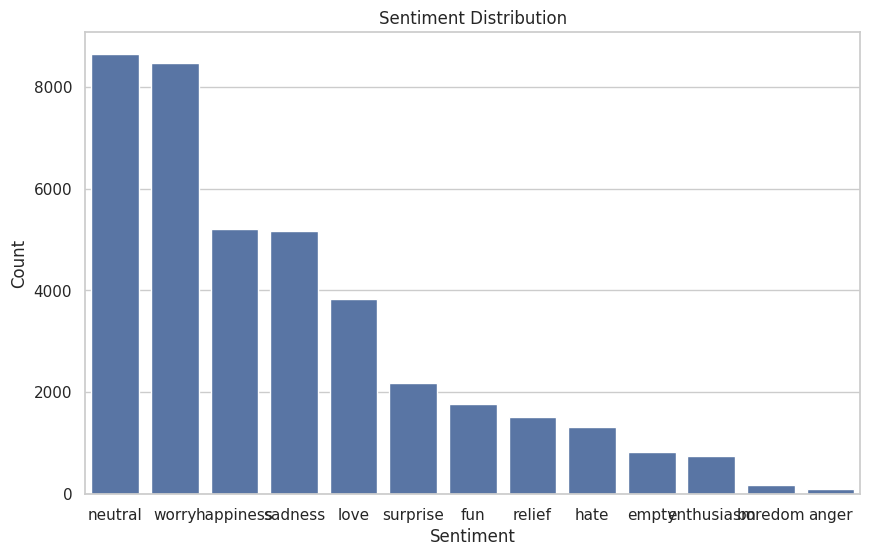

In [9]:
# Analyze sentiment distribution
sentiment_counts = data['sentiment'].value_counts()
print("\nSentiment distribution:")
print(sentiment_counts)

# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


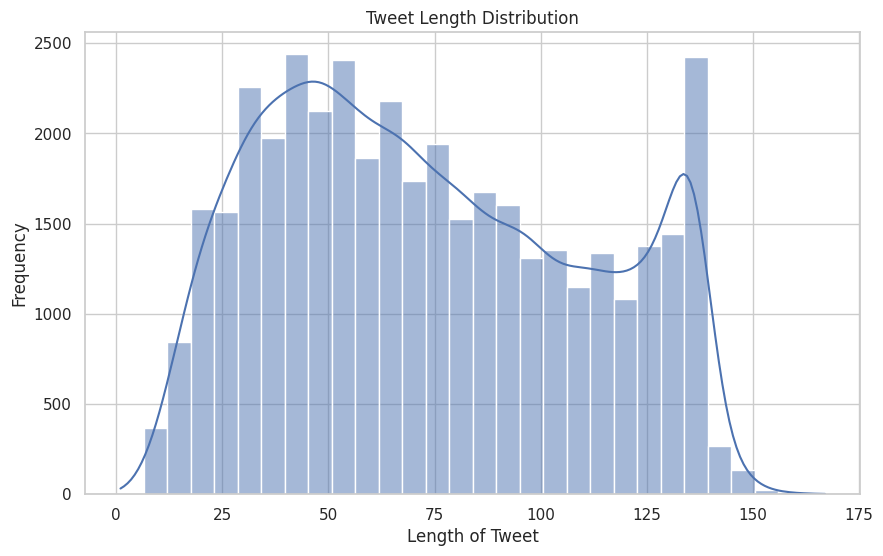

In [10]:
# Add a column for tweet length
data['tweet_length'] = data['content'].apply(len)

# Plot tweet length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['tweet_length'], bins=30, kde=True)
plt.title('Tweet Length Distribution')
plt.xlabel('Length of Tweet')
plt.ylabel('Frequency')
plt.show()


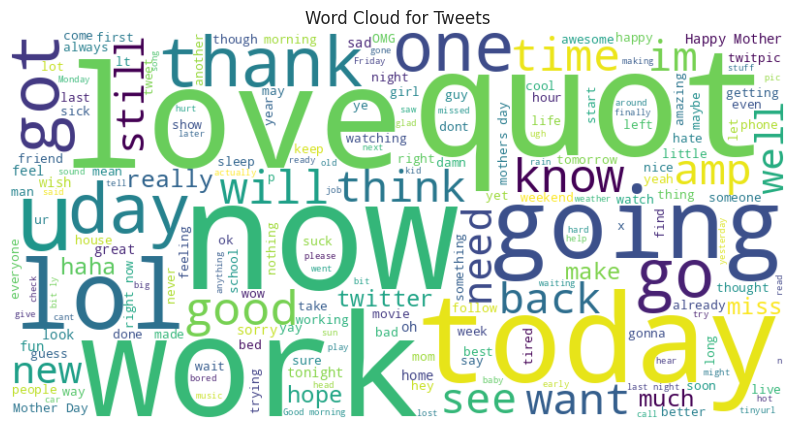

In [11]:
from wordcloud import WordCloud

# Generate a word cloud for the tweet content
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['content']))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Tweets')
plt.show()


In [12]:
# Function to clean text data
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters, digits, and punctuation
    text = re.sub(r'[\W_]+', ' ', text)  # Removes all non-word characters (punctuation and special characters)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text


# Apply text cleaning to the 'content' column
data['cleaned_content'] = data['content'].apply(clean_text)

print("Cleaned Content:")
print(data[['content', 'cleaned_content']])

Cleaned Content:
                                                 content  \
0      @tiffanylue i know  i was listenin to bad habi...   
1      Layin n bed with a headache  ughhhh...waitin o...   
2                    Funeral ceremony...gloomy friday...   
3                   wants to hang out with friends SOON!   
4      @dannycastillo We want to trade with someone w...   
...                                                  ...   
39995                                   @JohnLloydTaylor   
39996                     Happy Mothers Day  All my love   
39997  Happy Mother's Day to all the mommies out ther...   
39998  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...   
39999  @mopedronin bullet train from tokyo    the gf ...   

                                         cleaned_content  
0      tiffanylue i know i was listenin to bad habit ...  
1      Layin n bed with a headache ughhhh waitin on y...  
2                         Funeral ceremony gloomy friday  
3                    wants

In [13]:
!pip install transformers

In [14]:
!pip install torch torchvision torchaudio

In [15]:
from transformers import BertTokenizer
# Load BERT tokenizer
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the cleaned content
def tokenize_function(text):
    return bert_tokenizer.encode_plus(
        text,
        add_special_tokens=True,  # Add [CLS] and [SEP]
        max_length=128,           # Maximum length of tokens
        padding='max_length',     # Pad to max length
        truncation=True,          # Truncate longer texts
        return_tensors='pt'      # Return PyTorch tensors
    )

data['bert_tokens'] = data['cleaned_content'].apply(tokenize_function)

# Extract input IDs and attention masks
data['input_ids'] = data['bert_tokens'].apply(lambda x: x['input_ids'].squeeze().tolist())
data['attention_mask'] = data['bert_tokens'].apply(lambda x: x['attention_mask'].squeeze().tolist())

# Display relevant columns
print("BERT Tokenized Output:")
print(data[['tweet_id', 'sentiment', 'cleaned_content', 'input_ids', 'attention_mask']].head())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


BERT Tokenized Output:
     tweet_id   sentiment                                    cleaned_content  \
0  1956967341       empty  tiffanylue i know i was listenin to bad habit ...   
1  1956967666     sadness  Layin n bed with a headache ughhhh waitin on y...   
2  1956967696     sadness                     Funeral ceremony gloomy friday   
3  1956967789  enthusiasm                wants to hang out with friends SOON   
4  1956968416     neutral  dannycastillo We want to trade with someone wh...   

                                           input_ids  \
0  [101, 14381, 7630, 2063, 1045, 2113, 1045, 200...   
1  [101, 3913, 2378, 1050, 2793, 2007, 1037, 1497...   
2  [101, 6715, 5103, 24067, 2100, 5958, 102, 0, 0...   
3  [101, 4122, 2000, 6865, 2041, 2007, 2814, 2574...   
4  [101, 6266, 10526, 10486, 2057, 2215, 2000, 31...   

                                      attention_mask  
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [16]:
from sklearn.preprocessing import LabelEncoder

# Encoding the sentiment labels into integers
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['sentiment'])  # Convert sentiment to numerical labels

# Now, the 'label' column contains the numerical labels corresponding to each sentiment


In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
train_inputs, val_inputs, train_labels, val_labels = train_test_split(
    data['input_ids'], data['label'], test_size=0.1, random_state=42
)

train_masks, val_masks, _, _ = train_test_split(
    data['attention_mask'], data['label'], test_size=0.1, random_state=42
)


In [18]:
import torch

# Limit to 5,000 rows
max_rows = 5000

# Slice the input data
train_inputs = train_inputs[:max_rows]
train_labels = train_labels[:max_rows]
train_masks = train_masks[:max_rows]

# Similarly for validation data
val_inputs = val_inputs[:max_rows]
val_labels = val_labels[:max_rows]
val_masks = val_masks[:max_rows]

# Convert input_ids and attention_mask into torch tensors
train_inputs = torch.tensor(train_inputs.tolist())
val_inputs = torch.tensor(val_inputs.tolist())

# Convert labels to numpy arrays
train_labels = torch.tensor(train_labels.to_numpy())
val_labels = torch.tensor(val_labels.to_numpy())

train_masks = torch.tensor(train_masks.tolist())
val_masks = torch.tensor(val_masks.tolist())


In [19]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Create a TensorDataset
train_data = TensorDataset(train_inputs, train_masks, train_labels)
val_data = TensorDataset(val_inputs, val_masks, val_labels)

# Create DataLoader
batch_size = 32  # Choose the batch size you want

train_dataloader = DataLoader(
    train_data,
    sampler=RandomSampler(train_data),
    batch_size=batch_size
)

validation_dataloader = DataLoader(
    val_data,
    sampler=SequentialSampler(val_data),
    batch_size=batch_size
)


In [20]:
from transformers import BertForSequenceClassification, AdamW

# Load BERT for sequence classification with a specific number of output labels
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',  # Pretrained BERT model
    num_labels=3,         # Number of output labels (e.g., 3 for sentiment: positive, neutral, negative)
    output_attentions=False,  # Whether to return attention weights
    output_hidden_states=False  # Whether to return hidden states
)

# Move model to GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [21]:
# Define the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)  # Learning rate and epsilon

# Number of training epochs
epochs = 1

# Total number of training steps
total_steps = len(train_dataloader) * epochs

# Learning rate scheduler
from transformers import get_linear_schedule_with_warmup

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,  # Default value in BERT
                                            num_training_steps=total_steps)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from transformers import BertForSequenceClassification
from torch.nn import CrossEntropyLoss
import torch
from tqdm import tqdm

# Ensure you have the correct number of classes
num_classes = 13
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)

# Training loop
for epoch in range(epochs):
    print(f'Epoch {epoch+1}/{epochs}')

    # Set model to training mode
    model.train()

    total_loss = 0

    for step, batch in tqdm(enumerate(train_dataloader), total=len(train_dataloader)):
        # Unpack the batch and move to the GPU
        batch_input_ids, batch_attention_mask, batch_labels = tuple(t.to(device) for t in batch)

        # Clear previously calculated gradients
        model.zero_grad()

        # Forward pass
        outputs = model(batch_input_ids, token_type_ids=None, attention_mask=batch_attention_mask, labels=batch_labels)
        logits = outputs.logits

        # Check the shape of logits and labels
        print(f'Logits shape: {logits.shape}')  # Should be [batch_size, num_classes]
        print(f'Batch labels shape: {batch_labels.shape}')  # Should be [batch_size]

        # Loss calculation
        loss_fct = CrossEntropyLoss()
        loss = loss_fct(logits, batch_labels)
        total_loss += loss.item()

        # Backward pass
        loss.backward()

        # Clip the gradient to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        # Update parameters
        optimizer.step()

        # Update the learning rate
        scheduler.step()

    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Average Training Loss: {avg_train_loss}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/1


  0%|          | 0/157 [00:00<?, ?it/s]

Logits shape: torch.Size([32, 13])
Batch labels shape: torch.Size([32])


In [ ]:
# Validation phase
model.eval()
total_eval_accuracy = 0
total_eval_loss = 0

for batch in validation_dataloader:
    batch_input_ids, batch_attention_mask, batch_labels = tuple(t.to(device) for t in batch)

    with torch.no_grad():
        outputs = model(batch_input_ids, token_type_ids=None, attention_mask=batch_attention_mask, labels=batch_labels)

    # Get validation loss
    loss = outputs.loss
    total_eval_loss += loss.item()

    # Calculate accuracy
    logits = outputs.logits
    preds = np.argmax(logits.detach().cpu().numpy(), axis=1)

    # Debugging shapes
    print(f'Predictions shape: {preds.shape}, Labels shape: {label_ids.shape}')  # Add this line for debugging

    label_ids = batch_labels.cpu().numpy()

    # Check label_ids
    print(f'Label IDs: {label_ids}')  # Add this line for debugging

    total_eval_accuracy += np.sum(preds == label_ids)

avg_val_accuracy = total_eval_accuracy / len(val_labels)
avg_val_loss = total_eval_loss / len(validation_dataloader)

print(f"Validation Loss: {avg_val_loss}")
print(f"Validation Accuracy: {avg_val_accuracy}")
